# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [1]:
#Import all the necessary modules
import numpy as np
import pandas as pd
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


In [2]:
pima=pd.read_csv("pima-indians-diabetes+(3).csv")

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [3]:
pima.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [4]:
pima.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [5]:
pima.shape

(768, 9)

In [6]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [7]:
pima.loc[pima.Plas == 0,"Plas"]=pima.Plas.median()
pima.loc[pima.Pres == 0,"Pres"]=pima.Pres.median()
pima.loc[pima.skin == 0,"skin"]=pima.skin.median()
pima.loc[pima.mass == 0,"mass"]=pima.mass.median()
pima.loc[pima.test == 0,"test"]=pima.test.median()

In [8]:
pima[pima==0].count()

Preg     111
Plas       0
Pres       0
skin       0
test       0
mass       0
pedi       0
age        0
class    500
dtype: int64

In [9]:
pima[pima==1].count()

Preg     135
Plas       0
Pres       0
skin       0
test       0
mass       0
pedi       0
age        0
class    268
dtype: int64

In [10]:
pima.iloc[0:76]

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148.0,72.0,35.0,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23.0,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,23.0,30.5,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.0,23.0,30.5,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,23.0,30.5,32.0,0.232,54,1


# Q5 Print the descriptive statistics of each & every column using describe() function

In [11]:
pima.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 268.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

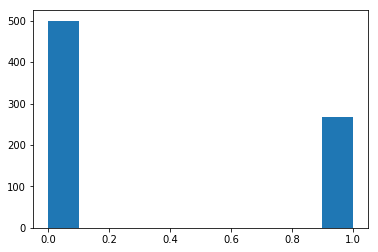

In [12]:
plt.hist(pima["class"])

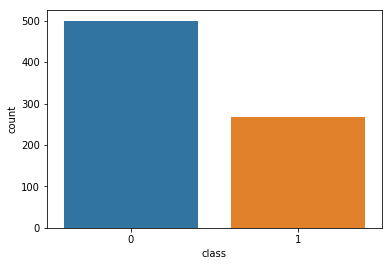

In [13]:
sns.countplot(x="class" , data=pima)

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

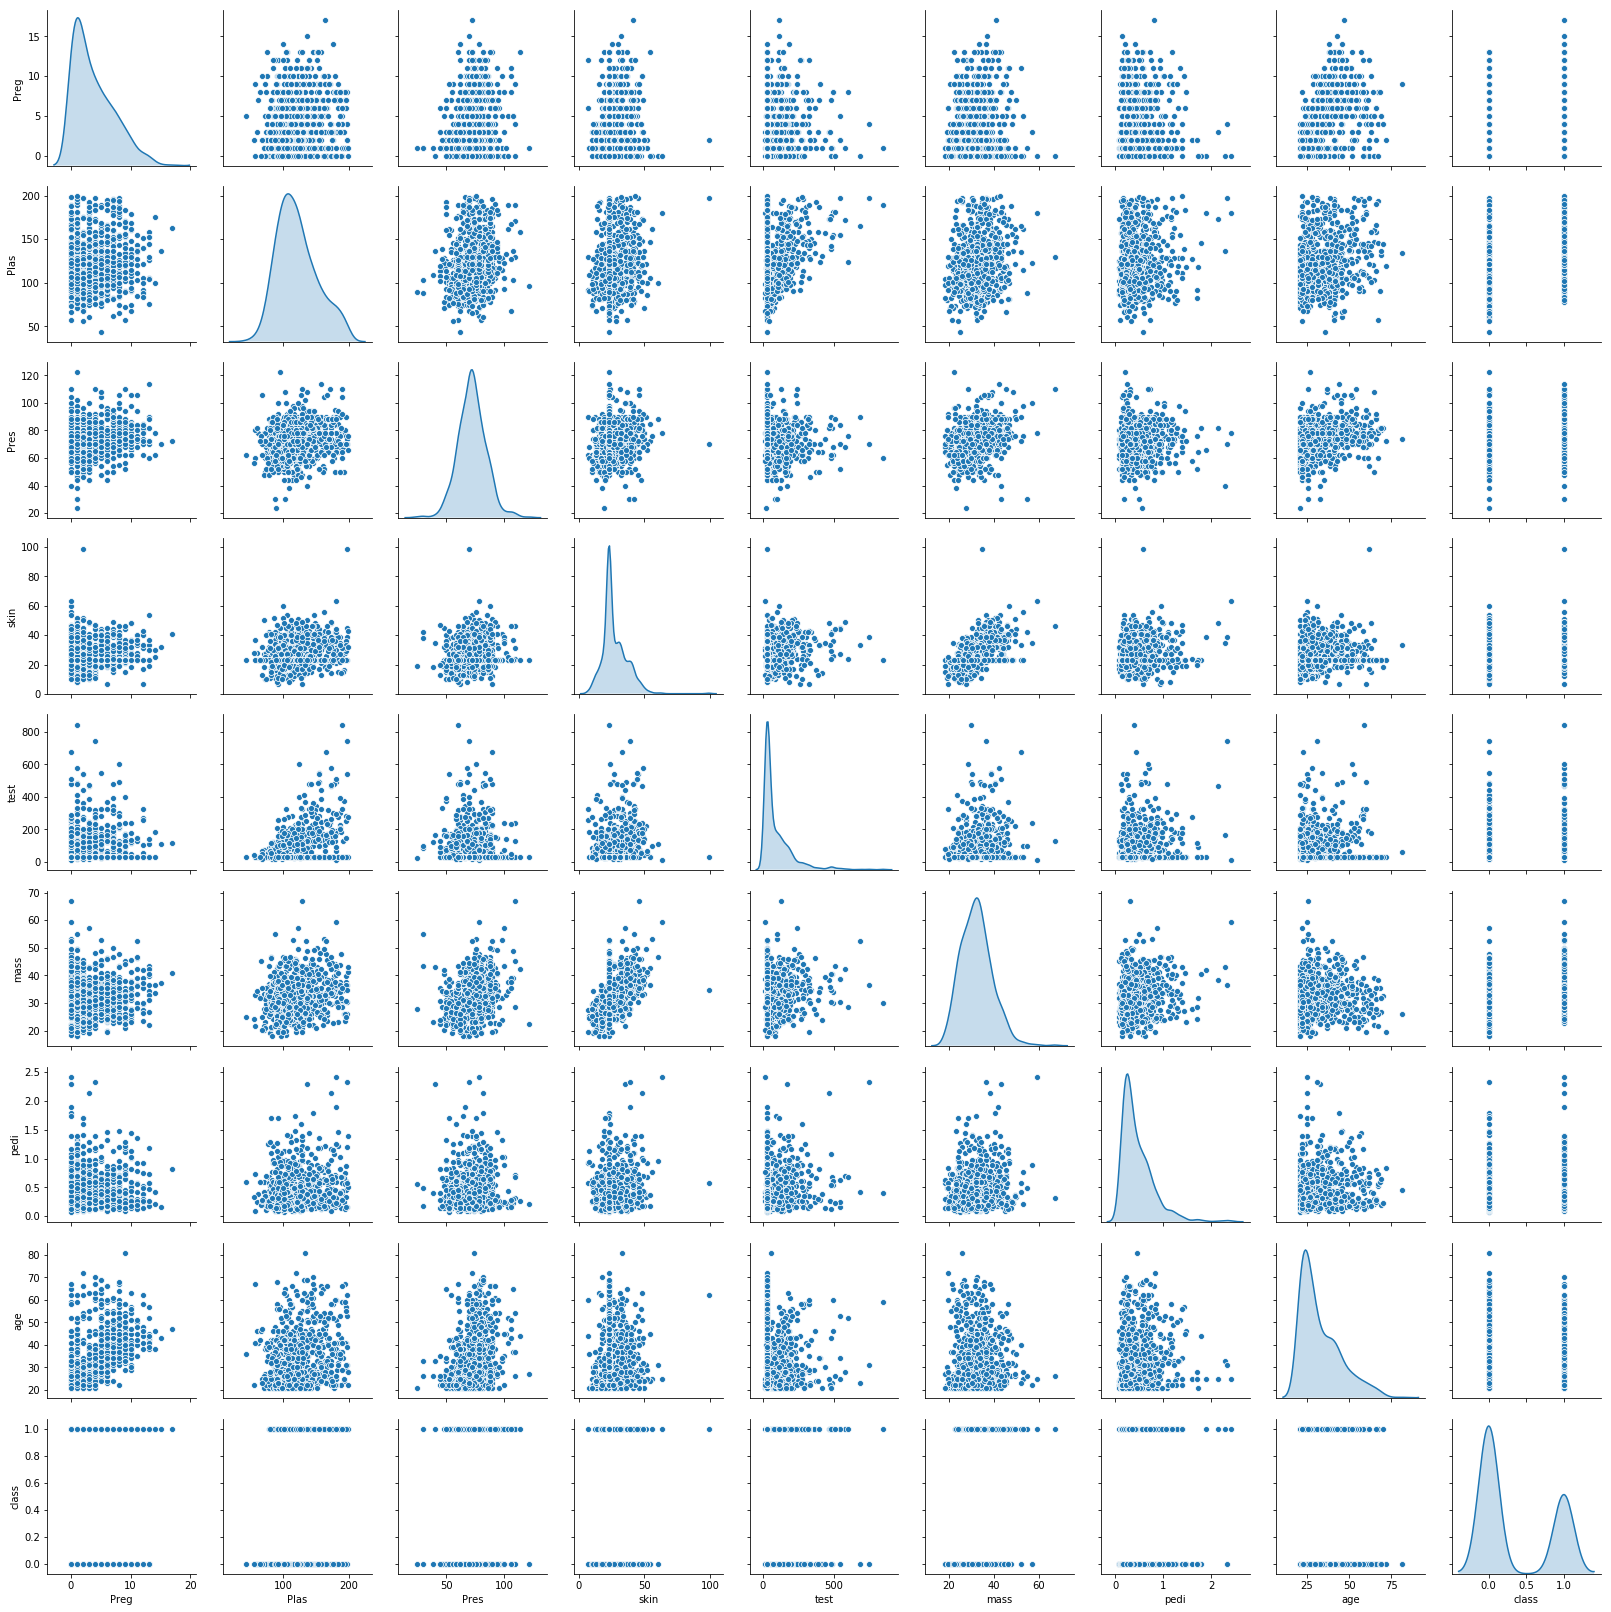

In [14]:
sns.pairplot(pima, diag_kind='kde')

In [15]:
pima.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Plas,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
Pres,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
skin,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
test,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
mass,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
pedi,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
class,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


Correlation is found to be higher between class and glucose plasma followed by body mass which is followed by age.
This implies that as glucose plasma level, body mass and age increases, there is a higher possibility of Diabetics.

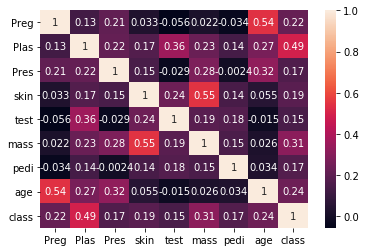

In [16]:
sns.heatmap(pima.corr() , annot=True)

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [17]:
x=pima.drop("class",axis=1)
y=pima["class"]
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc, roc_curve
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=7)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [18]:
model = DecisionTreeClassifier(criterion = 'entropy' )
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
from IPython.display import Image  
import pydotplus as pydot
from sklearn import tree
from os import system
import graphviz
x_label=("No","Yes")
dot_data = tree.export_graphviz(model, feature_names = list(x_train), class_names = list(x_label),filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph.render()

'Source.gv.pdf'

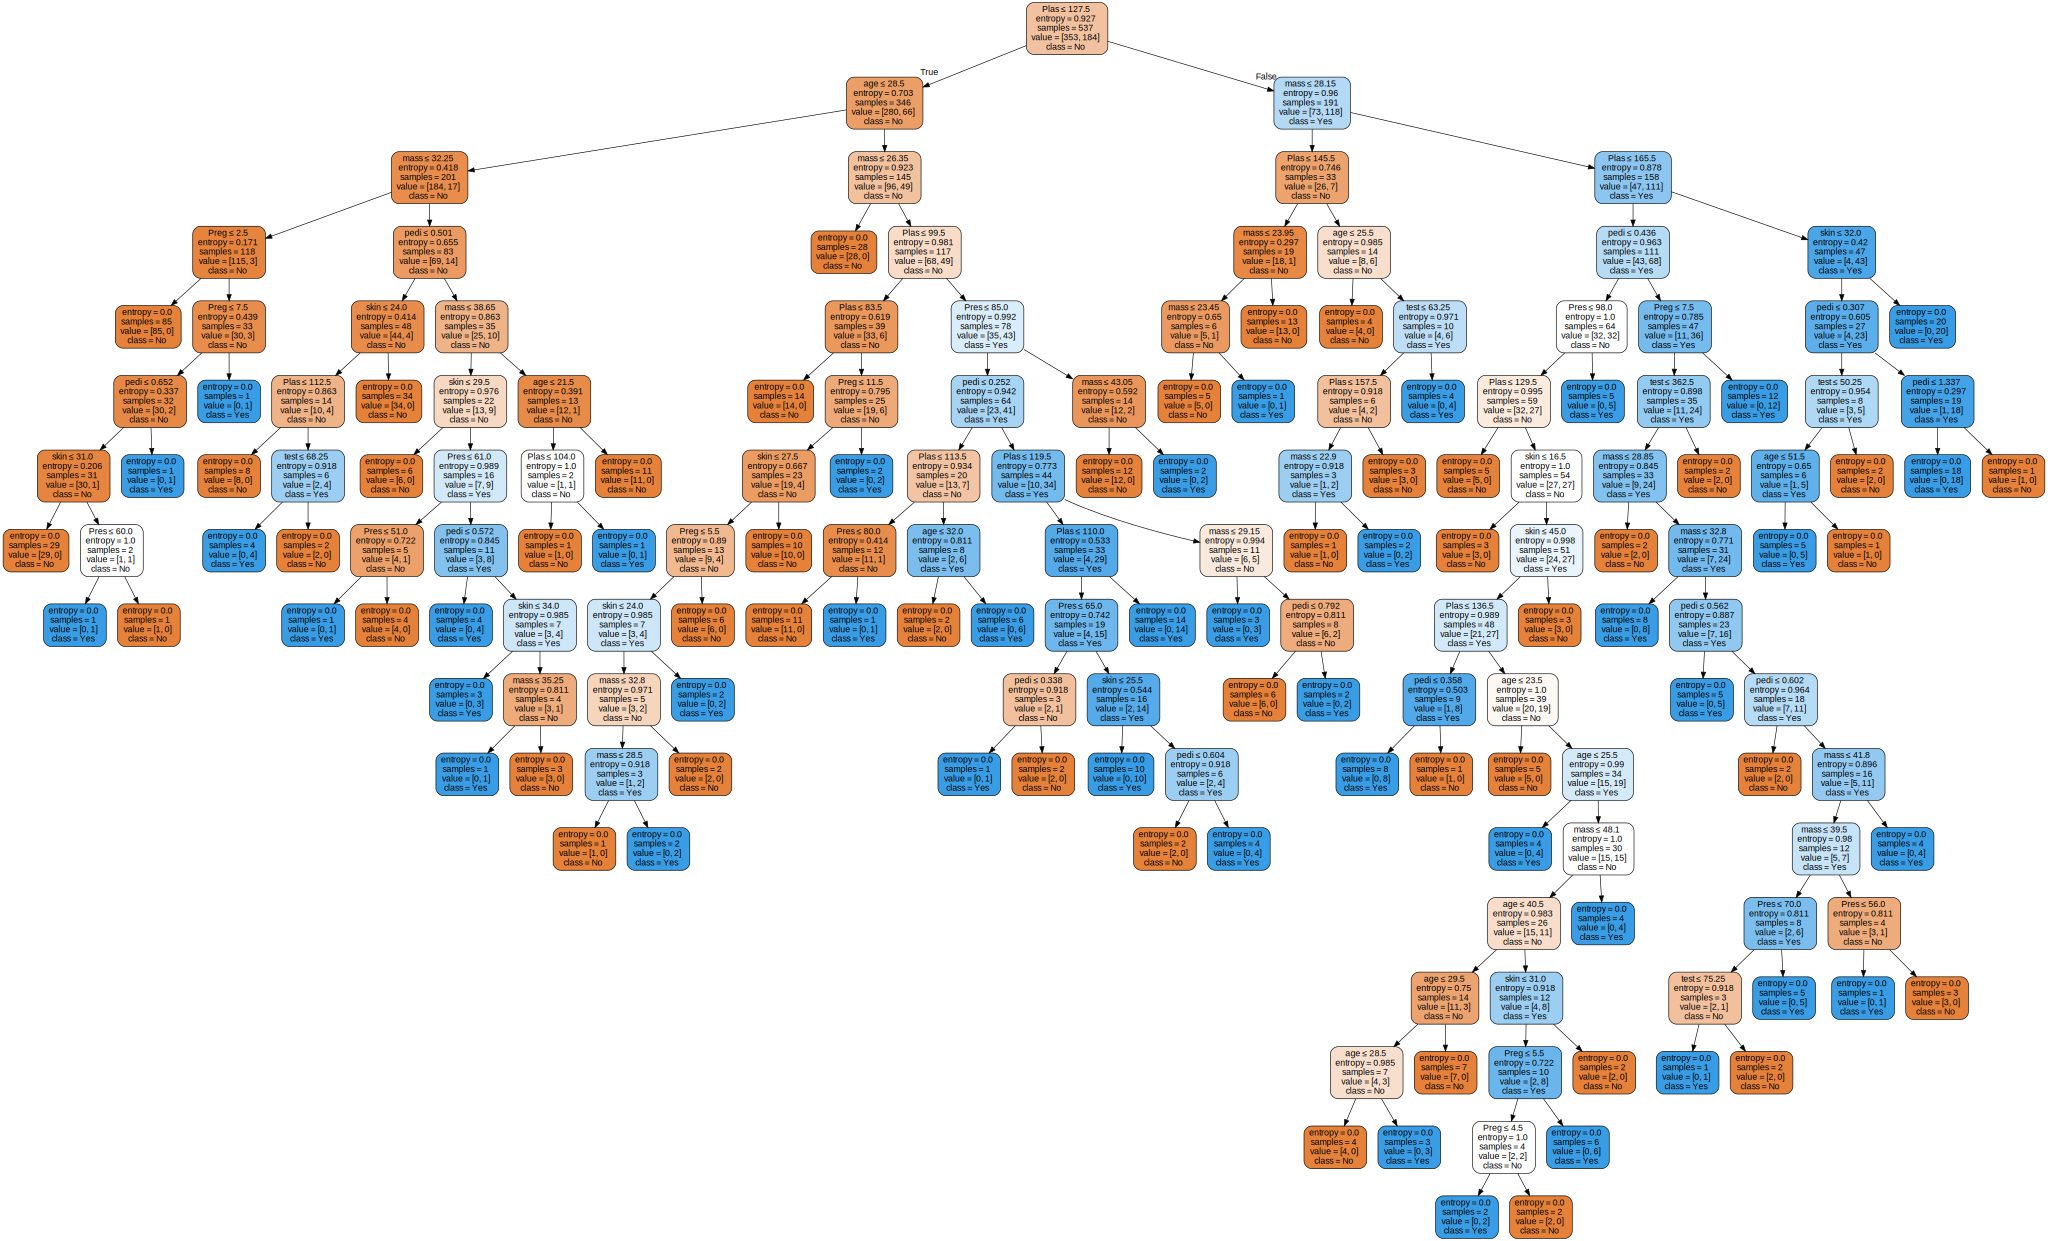

In [24]:
graph

# Q10 Print the accuracy of the model & print the confusion matrix 

In [25]:
y_predict=model.predict(x_train)
y1_predict=model.predict(x_test)

In [26]:
model.score(x_train,y_train)

1.0

In [27]:
model.score(x_test,y_test)

0.7229437229437229

In [28]:
metrics.confusion_matrix(y1_predict,y_test)

array([[117,  34],
       [ 30,  50]], dtype=int64)

In [29]:
metric=pd.DataFrame(columns=["TrainSet","TestSet"],index=["AccuracyScore","Precision","Recall","F1Score"])

In [30]:
metric.loc["AccuracyScore","TrainSet"]=accuracy_score(y_train,y_predict)
metric.loc["Precision","TrainSet"]=precision_score(y_train,y_predict)
metric.loc["Recall","TrainSet"]=recall_score(y_train,y_predict)
metric.loc["F1Score","TrainSet"]=f1_score(y_train,y_predict)

In [31]:
metric.loc["AccuracyScore","TestSet"]=accuracy_score(y_test,y1_predict)
metric.loc["Precision","TestSet"]=precision_score(y_test,y1_predict)
metric.loc["Recall","TestSet"]=recall_score(y_test,y1_predict)
metric.loc["F1Score","TestSet"]=f1_score(y_test,y1_predict)

In [32]:
metric

,TrainSet,TestSet
AccuracyScore,1,0.722944
Precision,1,0.625
Recall,1,0.595238
F1Score,1,0.609756


Print the feature importance of the decision model - Optional

In [29]:
print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = x_train.columns))

           Imp
Preg  0.073271
Plas  0.302682
Pres  0.060144
skin  0.066329
test  0.058012
mass  0.175211
pedi  0.097944
age   0.166406
